In [1]:
from ast import literal_eval
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/matches.csv')

In [3]:
df.head()

,match_id,date,year_month,map,w1,w2,w3,w4,l1,l2,...,w4_nr,l1_or,l2_or,l3_or,l4_or,l1_nr,l2_nr,l3_nr,l4_nr,map_only
0,804502,2023-12-09,2023-12,Runestones (Random civs),DOOMSTER,newisyou,Aragornn,Bondulkar,Saracen,leo.abnv,...,223,1455,1241,1054,885,1447,1233,1046,877,Runestones
1,804477,2023-12-09,2023-12,African Clearing (Random civs),Sephiroth,MODI,Himansu,Blitz,Saracen,KhalDrogo,...,473,1463,1354,675,609,1455,1346,667,601,African Clearing
2,804456,2023-12-09,2023-12,Arena (Random civs),Saracen,leo.abnv,newisyou,adirath,ForeRuthless,MODI,...,728,1320,1306,1266,234,1301,1287,1247,215,Arena
3,804244,2023-12-09,2023-12,Regicide Fortress (Random civs),SuLTaN,MrWrong,Sephiroth,adirath,🥭bush,Himansu,...,709,1512,1286,1248,781,1492,1266,1228,761,Regicide Fortress
4,804225,2023-12-09,2023-12,Arena Island (Random civs),Valar,MrWrong,peppapig2108,newisyou,🥭bush,SuLTaN,...,781,1529,1458,1303,706,1512,1441,1286,689,Arena Island


In [4]:
df.groupby(['year_month'])['match_id'].count().sort_index()

year_month
2022-01    240
2022-02    384
2022-03    219
2022-04    208
2022-05    215
2022-06    197
2022-07    146
2022-08    197
2022-09    292
2022-10    285
2022-11    226
2022-12    163
2023-01    175
2023-02    156
2023-03    324
2023-04    329
2023-05    329
2023-06    316
2023-07    335
2023-08    352
2023-09    364
2023-10    310
2023-11    258
2023-12    111
Name: match_id, dtype: int64

In [5]:
df.groupby('map_only')['match_id'].count().sort_values(ascending=False).head(20)

map_only
Arena               545
African Clearing    521
Runestones          508
Arabia              455
Hideout             446
Nomad               404
Oasis               311
Ghost Lake          284
4 Lakes             266
Golden Pit          233
Land Nomad          228
Black Forest        222
Valley              203
Kawasan             182
Mega Random         165
Steppe               95
Enclosed             94
Land Madness         88
Golden Lakes         73
Frontline            63
Name: match_id, dtype: int64

In [6]:
df.groupby('map')['match_id'].count().sort_values(ascending=False).head(20)

map
Hideout (Random civs)             423
African Clearing (Random civs)    421
Nomad (Random civs)               380
Arena (Random civs)               370
Runestones (Random civs)          336
Arabia                            312
Oasis (Random civs)               284
4 Lakes (Random civs)             266
Golden Pit                        233
Land Nomad (Random civs)          228
Ghost Lake                        213
Black Forest (Random civs)        212
Valley                            203
Arena                             175
Runestones                        172
Mega Random (Random civs)         165
Arabia (Random civs)              143
Kawasan (Random civs)             123
African Clearing                  100
Steppe                             95
Name: match_id, dtype: int64

In [7]:
player = 'TheLivi'
player = 'Plan B'
player = 'Mirror'
player = 'Thiru'
player = 'Kappa'
player = 'TalentButNoFarm'
player = 'Saracen'
player = 'Sephiroth'
player = 'DOOMSTER'
player = 'HELLRAZER'
player = 'addu'
player = 'Sargun'
player = 'Shadeslayer II'
player = 'Valar'
player = 'Water'
player = '🥭bush'
player = 'SuLTaN'
player = 'Just🅱an'
player = 'MODI'
player = 'Blitz'
player = 'newisyou'
player = 'Bondulkar'
player = 'ForeRuthless'
player = 'RedViper'

player = 'Phantom'
player = 'AgentP'

In [8]:
def player_map_stats(player):
    won_games = df[(df['w1'] == player) | (df['w2'] == player)  | (df['w3'] == player) | (df['w4'] == player)].\
            groupby('map')['match_id'].count().sort_values(ascending=False).reset_index()
    lost_games = df[(df['l1'] == player) | (df['l2'] == player)  | (df['l3'] == player) | (df['l4'] == player)].\
            groupby('map')['match_id'].count().sort_values(ascending=False).reset_index()

    results = won_games.merge(lost_games, on='map').rename(columns={'match_id_x': 'won', 'match_id_y': 'lost'})
    results['total'] = results['won'] + results['lost']
    results = results[['map', 'total', 'won', 'lost']]
    results['win_rate'] = round(results['won'] / results['total'] * 100, 2)
    print(results[['total', 'won', 'lost']].sum(), round(results['won'].sum() / results['total'].sum() * 100, 2))
    return results[results['total'] >= 1].sort_values(by='win_rate', ascending=False).reset_index(drop=True)

In [9]:
player_map_stats(player)

total    97
won      40
lost     57
dtype: int64 41.24


,map,total,won,lost,win_rate
0,4 Lakes (Random civs),6,5,1,83.33
1,Arabia,4,3,1,75.00
2,Valley,3,2,1,66.67
3,Nomad (Random civs),3,2,1,66.67
4,Serengeti (Random civs),3,2,1,66.67
5,Hideout (Random civs),7,4,3,57.14
6,Haboob (Random civs),2,1,1,50.00
7,Ghost Lake (Random civs),2,1,1,50.00
8,Steppe,2,1,1,50.00
9,Land Madness,2,1,1,50.00


In [10]:
min(df['year_month']), max(df['year_month'])

('2022-01', '2023-12')

In [11]:
# skeleton column of all months
all_months = ('2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', 
              '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', 
              '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', 
              '2023-07', '2023-08', '2023-09', '2023-10', '2023-11')
all_months_df = pd.DataFrame(all_months, columns=['year_month'])

player_matches = df[(df['w1'] == player) | (df['w2'] == player)  | (df['w3'] == player) | (df['w4'] == player) |
    (df['l1'] == player) | (df['l2'] == player)  | (df['l3'] == player) | (df['l4'] == player)]
matches_by_month = player_matches.groupby(['year_month'])['match_id'].count().sort_index().rename('matches played')

matches_by_month = all_months_df.merge(matches_by_month.reset_index(), how='left').\
    fillna(0).set_index('year_month')['matches played'].astype(int)
matches_by_month

year_month
2022-01    13
2022-02    11
2022-03     8
2022-04     1
2022-05    14
2022-06     9
2022-07     5
2022-08     6
2022-09     2
2022-10    14
2022-11     3
2022-12     0
2023-01     0
2023-02     0
2023-03     2
2023-04     1
2023-05     6
2023-06    17
2023-07     0
2023-08     0
2023-09    10
2023-10     2
2023-11    11
Name: matches played, dtype: int64

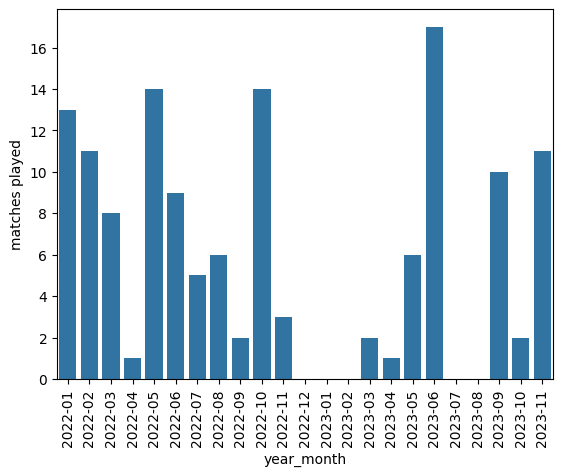

In [12]:
sns.barplot(matches_by_month)
plt.xticks(rotation=90);


In [13]:
df.groupby(['year_month', 'map'])['match_id'].count().sort_index

<bound method Series.sort_index of year_month  map                           
2022-01     4 Lakes (Random civs)              4
            African Clearing                  20
            African Clearing (Random civs)    21
            Alpine Lakes                       1
            Arabia                            15
                                              ..
2023-12     Socotra                            1
            Steppe                             1
            Team Acropolis (Random civs)       2
            Team Islands                       1
            Valley                             3
Name: match_id, Length: 689, dtype: int64>

In [14]:
top_maps = df.groupby('map_only')['match_id'].count().sort_values(ascending=False).head(10).index

In [15]:
map_stats = df[df['map_only'].isin(top_maps)].\
        groupby(['year_month', 'map_only'])['match_id'].count().\
        reset_index().rename(columns={'match_id': 'count'})

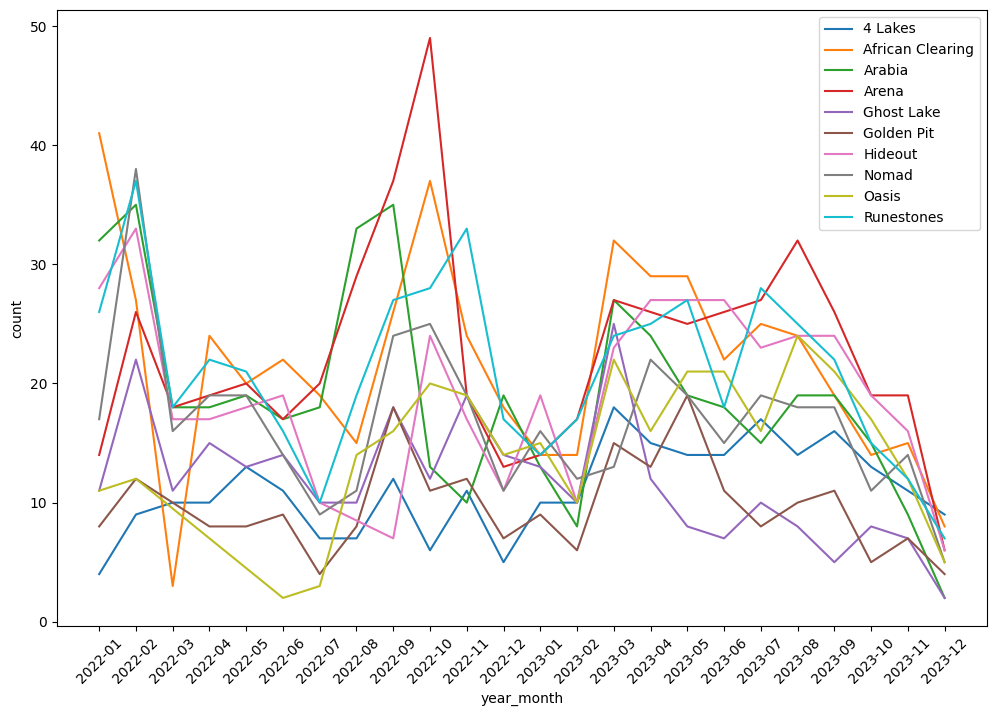

In [16]:
plt.figure(figsize=(12,8))
p = sns.lineplot(data=map_stats, x='year_month', y='count', hue='map_only')
plt.legend(loc='upper right')
p.legend(bbox_to_anchor = (1, 1))
plt.xticks(rotation=45);

In [17]:
date_skeleton = pd.DataFrame(pd.date_range(min(player_df['date']), max(player_df['date']), freq='d').astype('str'), columns=['date'])
plot = sns.lineplot(data=date_skeleton.merge(player_df, on='date', how='left'), x='date', y='player_rating')
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 28 == 0:  # every 28th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90);
st.pyplot(plot.get_figure())


NameError: name 'player_df' is not defined